# Machine Learning, Test 1

In [1]:
## ML Learning

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# from wrangling4 import *
# poly, lyftSF19_df, docked_df, docked_df100_intersect = lyft19Combined()

In [2]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv(r'inputs/data_lyftSF2019/outputs/lyftSF19.csv',float_precision=None)

FileNotFoundError: [Errno 2] No such file or directory: 'inputs/data_lyftSF2019/outputs/lyftSF19.csv'

In [7]:
del df['Unnamed: 0']
display(df.columns)
df.head()

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method', 'start_neighborhood',
       'date_start', 'hour_start', 'date_end', 'hour_end', 'end_neighborhood',
       'start_time_day', 'start_time_month', 'start_time_hour', 'end_time_day',
       'end_time_month', 'end_time_hour', 'G_distance', 'G_time', 'geometry',
       'Dockless_Type', 'route', 'Quarter', 'ebike_trip', 'duration_min',
       'est_cost'],
      dtype='object')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,end_time_hour,G_distance,G_time,geometry,Dockless_Type,route,Quarter,ebike_trip,duration_min,est_cost
0,1767,2019-01-01 00:08:39,2019-01-01 00:38:06,16.0,Steuart St at Market St,37.79413,-122.39443,115.0,Jackson Playground,37.765026,...,1,5268.0,1217.0,NaN,NaN,From Steuart St at Market St to Jackson Playgr...,2019Q1,No,29,2
1,1037,2019-01-18 08:32:34,2019-01-18 08:49:52,16.0,Steuart St at Market St,37.79413,-122.39443,115.0,Jackson Playground,37.765026,...,9,5268.0,1217.0,NaN,NaN,From Steuart St at Market St to Jackson Playgr...,2019Q1,No,17,2
2,860,2019-01-19 20:49:01,2019-01-19 21:03:22,16.0,Steuart St at Market St,37.79413,-122.39443,115.0,Jackson Playground,37.765026,...,21,5268.0,1217.0,NaN,NaN,From Steuart St at Market St to Jackson Playgr...,2019Q1,No,14,0
3,1070,2019-01-22 18:28:11,2019-01-22 18:46:01,16.0,Steuart St at Market St,37.79413,-122.39443,115.0,Jackson Playground,37.765026,...,19,5268.0,1217.0,NaN,NaN,From Steuart St at Market St to Jackson Playgr...,2019Q1,No,17,0
4,1243,2019-01-25 16:58:55,2019-01-25 17:19:39,16.0,Steuart St at Market St,37.79413,-122.39443,115.0,Jackson Playground,37.765026,...,17,5268.0,1217.0,NaN,NaN,From Steuart St at Market St to Jackson Playgr...,2019Q1,No,20,2


In [8]:
### Estimate the duration of a trip by start-location without knowing the destination
    ### Filter dock-to-dock
        ### Narrow to neighborhoods which are the busiest
            ### Factorize all stations within those neighborhoods
                ### Remove datapoints where end_destination is an outlier

df1 = df

df1.user_type = pd.Series(np.where(df1.user_type == 'Customer', 1, 0)) # Customer = 1, Subscriber = 0
df1.bike_share_for_all_trip = pd.Series(np.where(df1.bike_share_for_all_trip == 'No', 1, 0)) # No = 1, Yes = 0
df1.start_time_day = pd.factorize(df1['start_time_day'])[0] # [0, 1, 2, 3, 4, 5, 6] = ['Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Sunday', 'Monday', 'Thursday']
df1.rental_access_method = pd.factorize(df1['rental_access_method'])[0] # [NaN, 'app', 'clipper'] = [-1,0,1]
df1.start_time_month = pd.factorize(df1['start_time_month'])[0] # [0,1,2,3,4,5,6,7,8,9,10,11] = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
df1.Dockless_Type = pd.factorize(df1['Dockless_Type'])[0] # ['N/A', 'Dockless_Start', 'Dockless_End', 'Dockless_to_Dockless'] = [0,1,2,3]
df1.Quarter = pd.factorize(df1['Quarter'])[0] # ['2019Q1', '2019Q2', '2019Q3', '2019Q4'] = [0,1,2,3]
df1.ebike_trip = pd.factorize(df1['ebike_trip'])[0] # ['No', 'Yes'] = [0,1]

df1 = df1[['start_station_latitude',
       'start_station_longitude', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method',
       'start_time_day', 'start_time_month', 'start_time_hour',
       'Dockless_Type', 'Quarter', 'ebike_trip',
       'est_cost','duration_sec']]

X = df1[['start_station_latitude',
       'start_station_longitude', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method',
       'start_time_day', 'start_time_month', 'start_time_hour',
       'Dockless_Type', 'Quarter', 'ebike_trip',
       'est_cost']]

y = df1[['duration_sec']] # Predicting the duration of a trip

In [ ]:
### Knowing the pick-up stations with xyz (mostly temporal) attributes, can you predict the route (the end station)?
    ### Logistic problem: where to allocate bikes when you've an outflow of people from station A, to B.
        ### "route modelling"
            ### How many bikes should be available at a given station {and at a given time}?
        ### Encode into time intervals: morning, afternoon, evening.
            ### Days: encode into weekdays and weekends
            ### Months: encode into "4 seasons"

    ### Backtracking the data: extract random observations (as a validation set, 10K) in a separate DF as a validation set.
        ### Test the model with the validation set to create  a forecast analysis of the model.

In [9]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for start_station_latitude is 3383.381418181455
The coefficient for start_station_longitude is -3310.1115559859245
The coefficient for user_type is 1.8189894035458565e-11
The coefficient for bike_share_for_all_trip is -1.1368683772161603e-12
The coefficient for rental_access_method is 28.317866406167134
The coefficient for start_time_day is 0.12892796691802139
The coefficient for start_time_month is -16.58795541166761
The coefficient for start_time_hour is 1.2133975876762728
The coefficient for Dockless_Type is -12.417123996332892
The coefficient for Quarter is 26.982222618585638
The coefficient for ebike_trip is 113.70507695375281
The coefficient for est_cost is 316.84739010548157


In [25]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -532357.0351922489


In [26]:
regression_model.score(X_test, y_test)

0.9137077211725886

In [27]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

289234.90441516484

In [28]:
import math

math.sqrt(regression_model_mse)

537.8056381399928

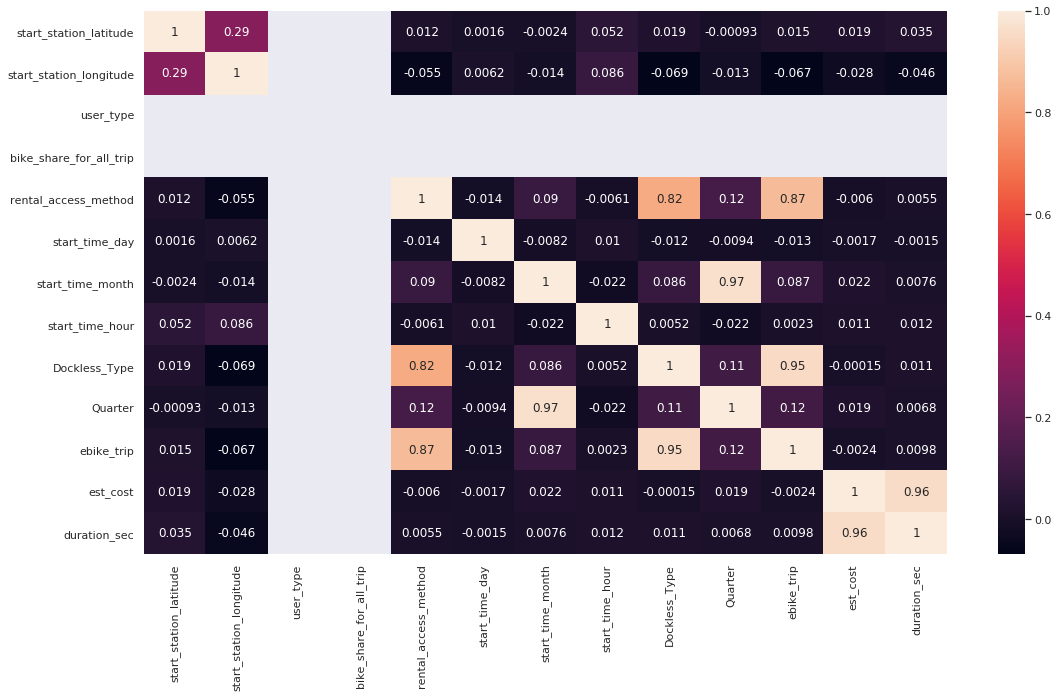

In [34]:
corrMatrix = df1.corr()

sns.set(rc={'figure.figsize':(18,10)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [35]:
import statsmodels.formula.api as smf
reg = smf.ols('y ~ X', data=df1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.968e+06
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:43:48   Log-Likelihood:            -1.4277e+07
No. Observations:             1852283   AIC:                         2.855e+07
Df Residuals:                 1852272   BIC:                         2.855e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.348e+05   3981.490   -134.310      0.000   -5.43e+05   -5.27e+05
X[0]        3410.1731     31.483    108.318      0.000    3348.467    3471.879
X[1]       -3321.4263     28.318   -117.291      0.000   -3376.928   -3265.924
X[2]        5.035e-07   3.75e-09    134.311      0.000    4.96e-07    5.11e-07
X[3]       -3.264e-07   2.43e-09   -134.309      0.000   -3.31e-07   -3.22e-07
X[4]          29.3400      3.703      7.923      0.000      22.082      36.598
X[5]           0.2020      0.186      1.088      0.277      -0.162       0.566
X[6]         -16.4364      0.481    -34.136      0.000     -17.380     -15.493
X[7]           1.1555      0.083     13.916      0.000       0.993       1.318
X[8]         -10.7175      2.865     -3.740      0.000     -16.334      -5.101
X[9]          26.7348      1.457     18.350      0.000      23.879      29.590
X[10]        106.9698      8.400     12.735      0.000      90.507     123.433
X[11]        316.8148      0.072   4424.285      0.000     316.674     316.955
==============================================================================
Omnibus:                  1323229.298   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        181319642.771
Skew:                           2.579   Prob(JB):                         0.00
Kurtosis:                      51.195   Cond. No.                     5.86e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.98e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""